In [ ]:
%%capture
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None


In [ ]:
df = pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5728, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.text = df.text.astype('str')

Distribution of Spam and Non-spam Email

In [ ]:
temp = df.groupby('spam').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,spam,text
0,0,4360
1,1,1368


<Axes: xlabel='spam', ylabel='count'>

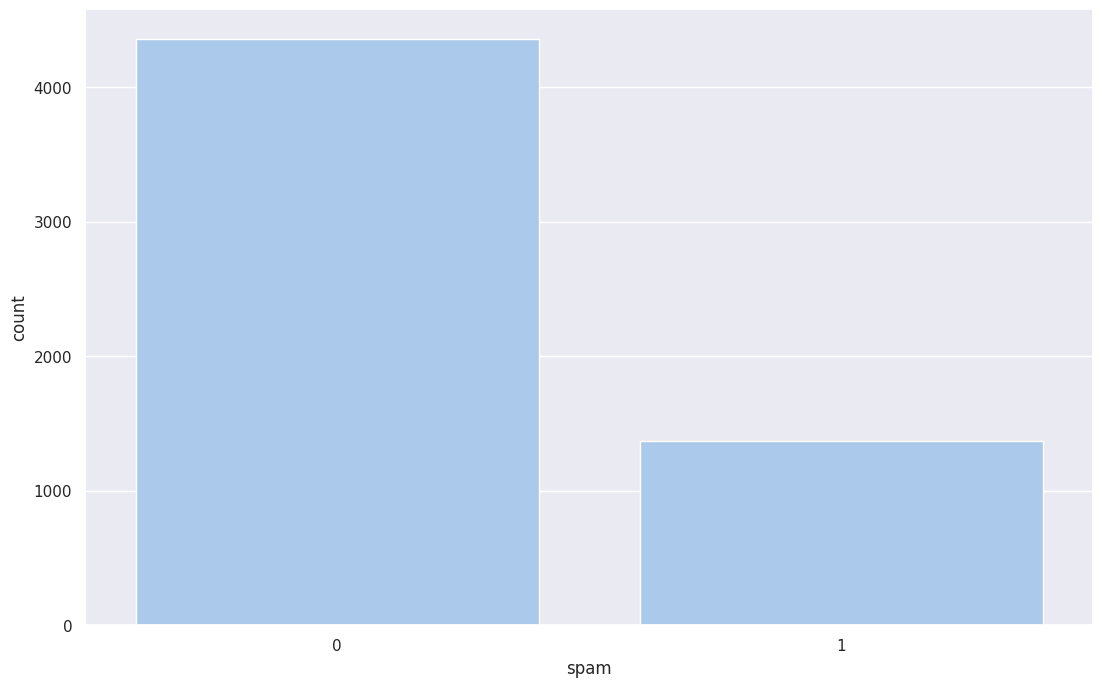

In [ ]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='spam',data=df)

WordCloud of Our Emails

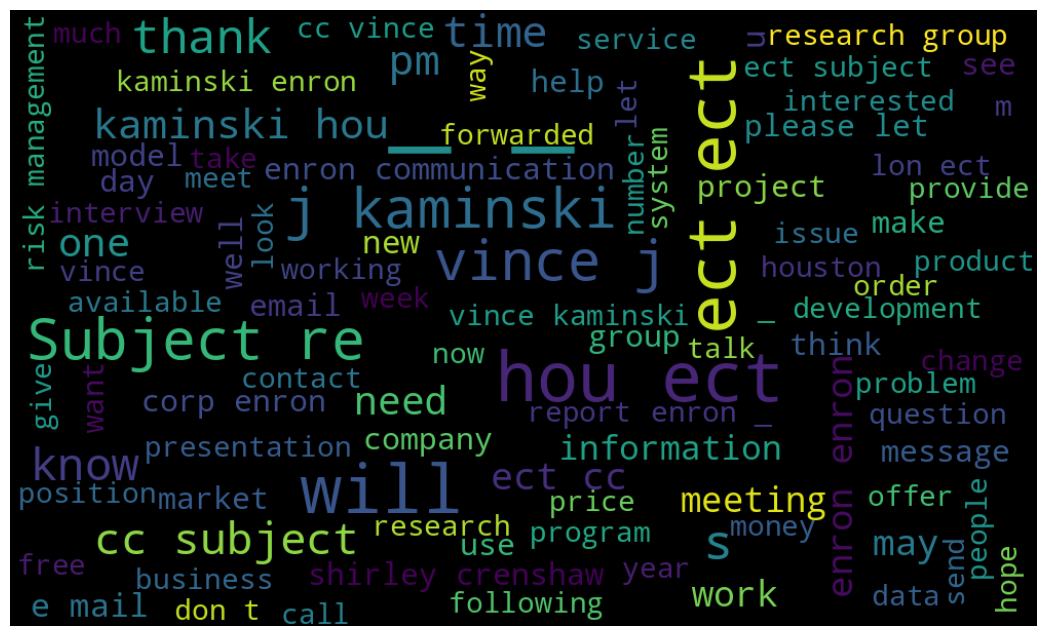

In [ ]:
txt = ' '.join(rev for rev in df.text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

WordCloud of Ham and Spam Emails

In [ ]:
ham = df[df['spam'] == 0]
spam = df[df['spam'] == 1]

Ham Emails

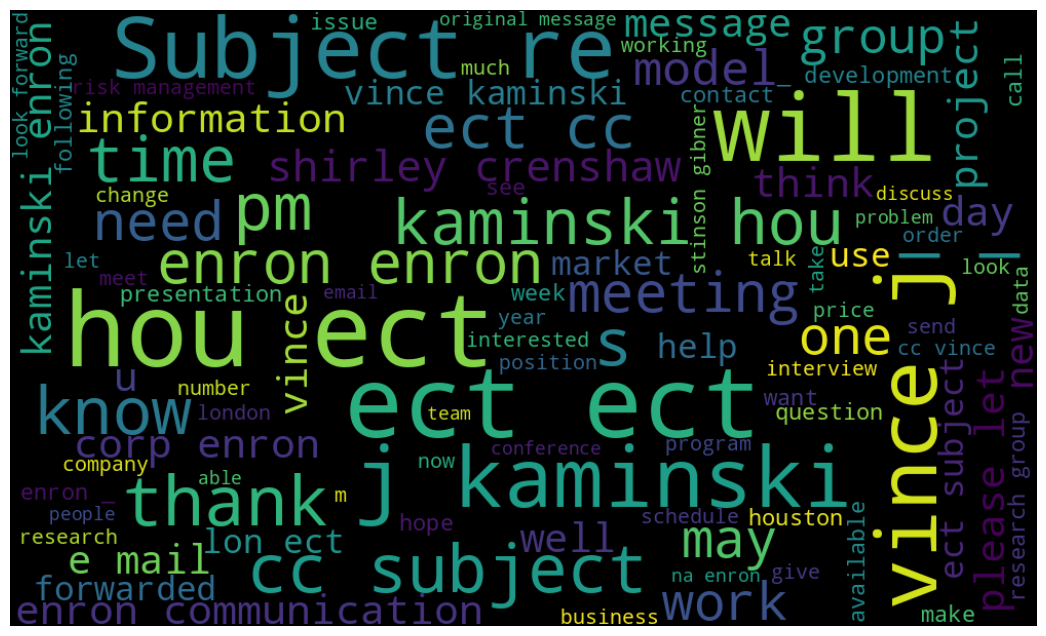

In [ ]:
txt = ' '.join(rev for rev in ham.text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Spam Emails

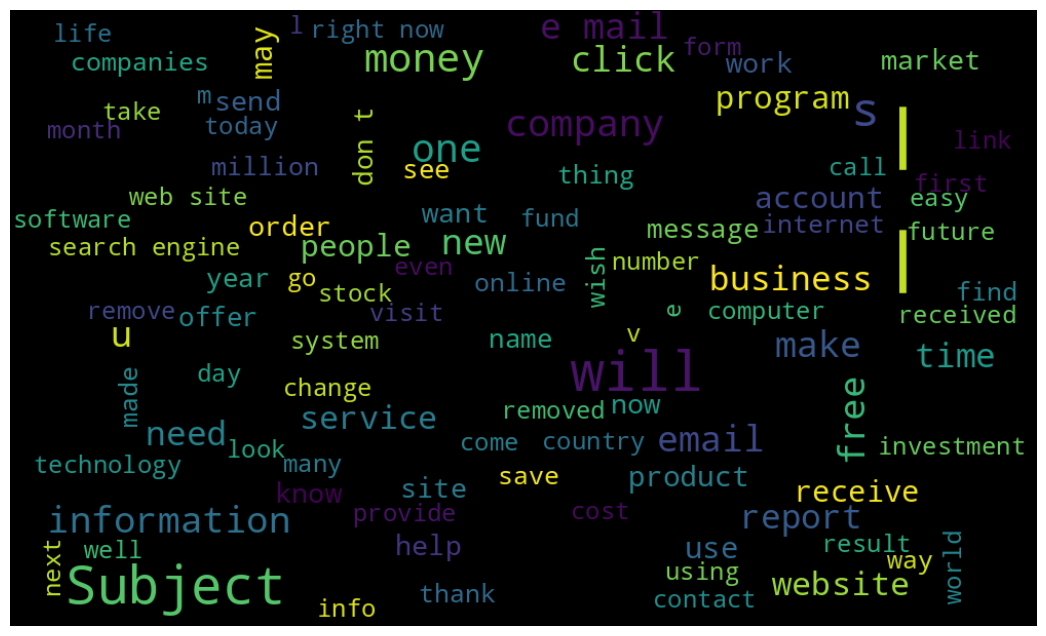

In [ ]:
txt = ' '.join(rev for rev in spam.text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Distribution of Number of Email Words

<Axes: xlabel='Num_word_email', ylabel='Count'>

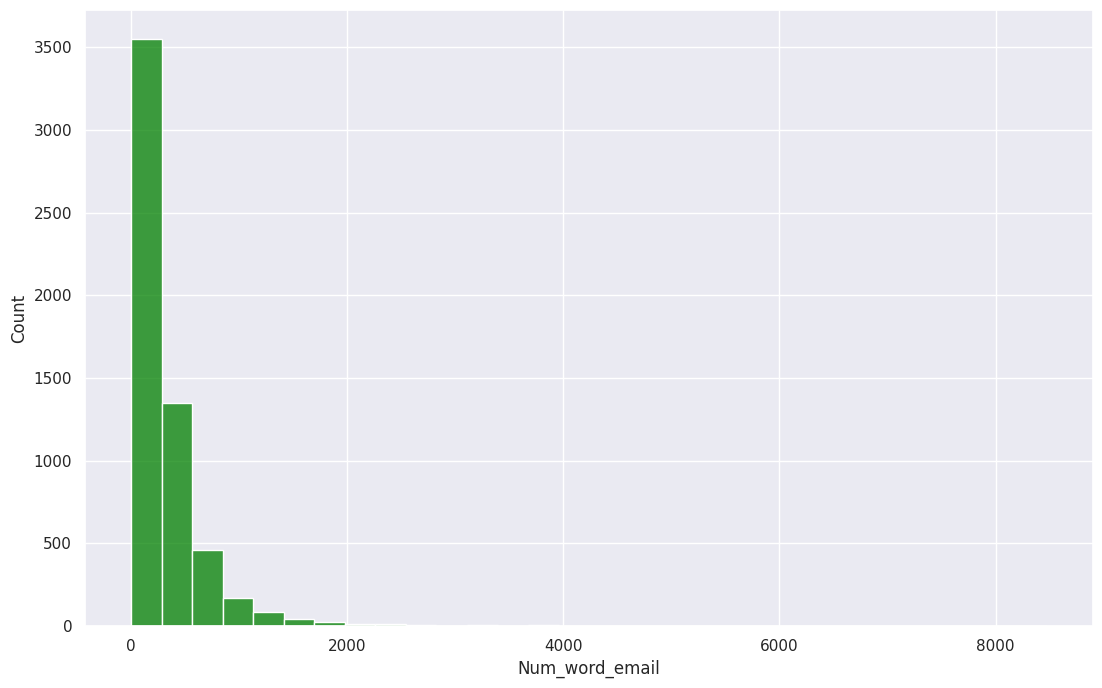

In [ ]:
df_vis = df.copy()
df_vis['Num_word_email'] = df_vis['text'].apply(lambda x:len(str(x).split()))
sns.histplot(data=df_vis, x="Num_word_email",bins=30,color='green')

Distribution of Words in All Review Texts

In [ ]:
df_vis['temp_list'] = df_vis['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,-,105222
1,.,92494
2,",",61143
3,the,50110
4,:,42370
5,to,41736
6,/,40311
7,and,27478
8,of,23757
9,>,22252


Data Cleaning For Sentiment Processing

In [ ]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5695, 2)

 clean some basic characters

In [ ]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

function to remove numeric

In [ ]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

function to remove emoji

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

function to unify whitespaces

In [ ]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

function to remove symbols

In [ ]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

function to remove punctuation

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

function to remove stopwords

In [ ]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

 function to use stemming to normalize words

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

combine all the cleaning functions

In [ ]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [ ]:
cleaning(df,'text')

In [ ]:
df[['text']].head(20)

,text
0,subject natur irresist corpor ident lt realli ...
1,subject stock trade gunsling fanni merril muzo...
2,subject unbeliev new home made easi im want sh...
3,subject color print special request addit info...
4,subject money get softwar cds softwar compat g...
5,subject great nnew hello welcom medzonlin sh g...
6,subject hot play motion homeland secur invest ...
7,subject save money buy get thing tri ciall yet...
8,subject undeliver home base busi grownup messa...
9,subject save money buy get thing tri ciall yet...


In [ ]:
df_vis2 = df.copy()
df_vis2['temp_list'] = df_vis2['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,enron,13335
1,ect,11420
2,subject,10142
3,vinc,8469
4,hou,5575
5,com,5396
6,pleas,5059
7,kaminski,4754
8,would,4399
9,cc,3869


<Axes: xlabel='count', ylabel='Common_words'>

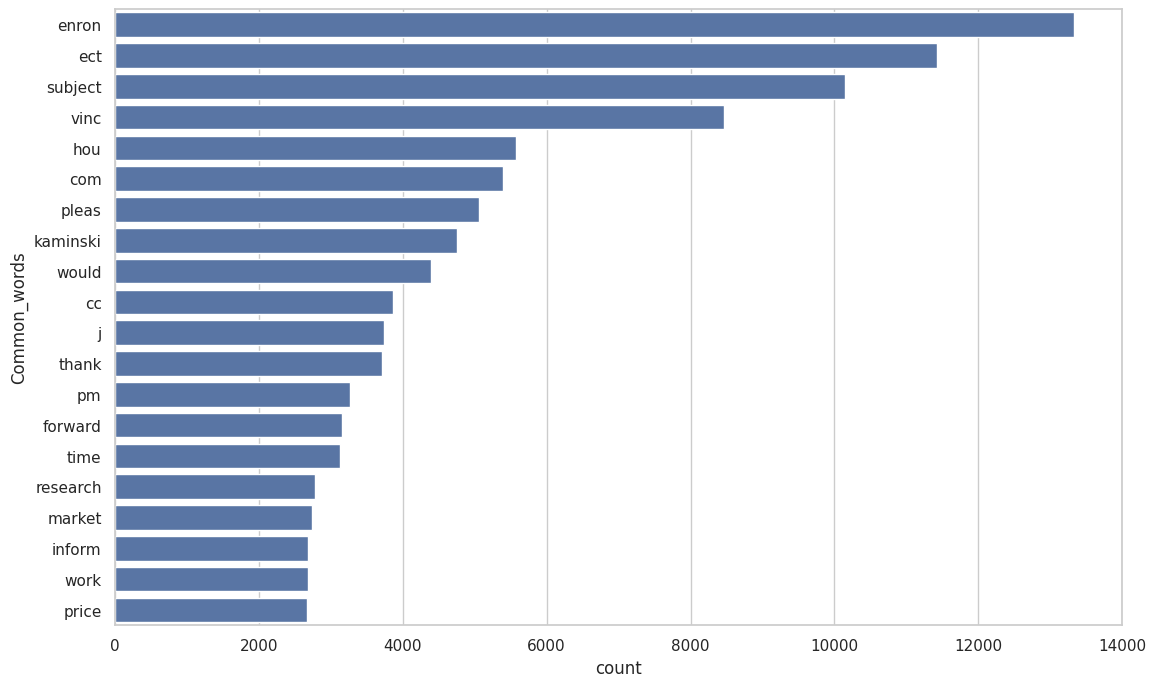

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

Creating Bag of Words and Text Classifier Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [ ]:
df.Category = df.spam.replace({'ham':0,'spam':1})

<ipython-input-87-bc4666975077>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Category = df.spam.replace({'ham':0,'spam':1})


In [ ]:
X = df['text']
y = df['spam']

Tokenizing and Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,test_size = 0.20)

In [ ]:
text_classifier = clf.fit(X_train,y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
np.unique(predictions)

array([0, 1])

Model's Performance

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
confusion_matrix(y_test,predictions)

array([[851,   2],
       [ 11, 275]])

In [ ]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[1,0]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [ ]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       286
           0       0.99      1.00      0.99       853

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.98      1139
weighted avg       0.99      0.99      0.99      1139



TN - True Negative 275
FP - False Positive 11
FN - False Negative 2
TP - True Positive 851
Accuracy Rate: 0.9885864793678666
Misclassification Rate: 0.01141352063213345
F1-Score: 0.984664619463619
ROC-AUC 0.9795968978266751


<Axes: >

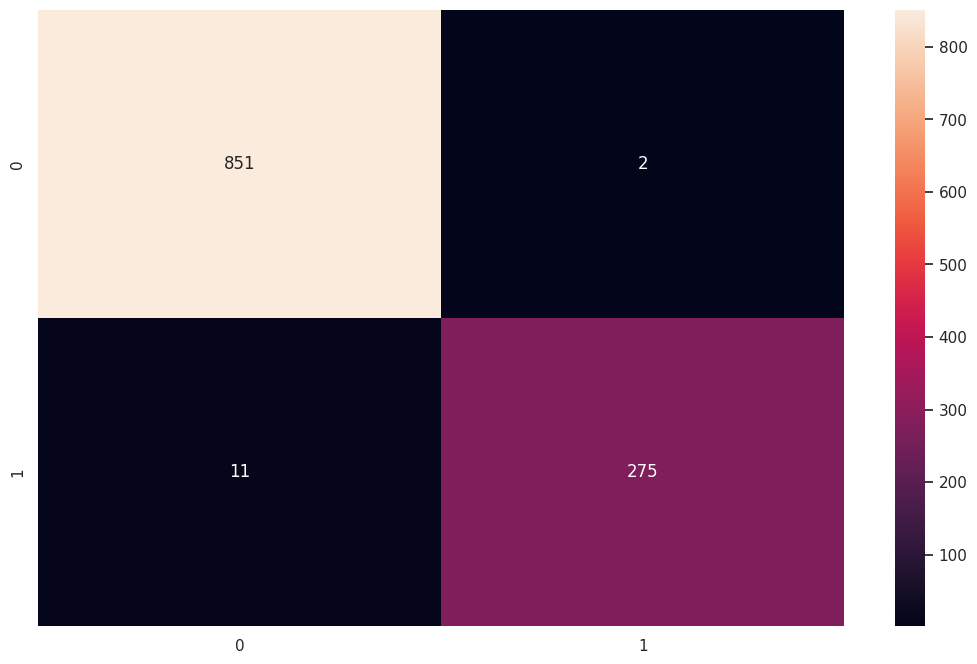

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')